### Image Segmentation

* It is the process of partitioning an image into multiple different region or segmentation.
* Image segmenatation to separate objects and analyze each object individually to check what it is.
* Image segmentation usually serves as the preprocessing before pattern recognition, feature extraction, compression of the image.

**Uses:**
    *Image segmentation is used to anlayze and find inside image.*

### Image Segmentation Using k-means clustering

**K-means:**
* K-means is a clustering algorithm, it is unsupervised machine learning which means that there is no labelled data available.
* It is used to identify different classes and clusters in the given data based on how similar the data is.

*The k-means clustering algorithm mainly performs two tasks:*
* Determines the best value for k-center points or centroids by an iterative process.
* Assign each data point to its closest k-center.Those data points which are near to the particular k-center,create a cluster.

*Working of the Algorithm:*
* Step1: Select the number k to decide the no.of clusters.
* Step2: Select random k pionts or centroids.
* Step3: Assign each data point to closest centroid, which will form the predefined k clusters.
* Step4: Calculate the variance and place a new centroid of each cluster.
* Step5: Repeat the third steps, which means reassign each data point to the new closest centroid of each cluster.
* Step6: If any reassignment occurs, then go to step 4 else go to Final step.
* Step7: The model is ready

**K-means Clustering in OpenCV** 

**Input Parameters:**

*Samples:* It should be of np.float32 datatype, and each feature should be put in a single column.

*nclusters(k):* Number of clusters required at end.

**Criteria:** It is the iteration termination criteria.Whwn the criteria is satisfied, algorithm iteration stops.Actually,it should be a tuple of 3 parameters.

* They are (type,max_iter,epsilon)

*Type of termination Criteria:*

It has 3 flags below:

**cv.TERM_CRITERIA_EPS** - Stop the algorithm iteration if specified accuracy,epsilon,is reached.

**cv.TERM_CRITERIA_MAX_ITER** - Stop the algorithm after the specified no.of iterations, max_iter.

**cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER** - Stop the iteration when any of the above condition is met.

* *max_iter* - An integer specifying maximum no.of iterations.
* *epsilon* - Required accuracy.
* *attempts* - Flag to specify the number of times the algorithm is executed using different initial labelling.The algorithm returns the labels that yield the best compactness.This compactness is returned as output.
* *flags* - This flag is used to specify how initial centers are taken.Normally two flags are used for this: 
    * cv.KMEANS_PP_CENTERS and cv.KMEANS_RANDOM_CENTERS


**Output Parameters:**
* Compactness : It is the sum of squared distance from each point to their corresponding centers.
* labels : This is the label array where each element marked '0','1'....
* centers : This is array of centers of clusters.

### Applying Image Segmentation on Colored Image

In [1]:
#importing libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

Matrix of Original Image
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
Shape of Original Image
(1200, 1920, 3)
After Reshaping : 
[[0 0 0]
 [0 0 0]
 [0 0 0]
 ...
 [0 0 0]
 [0 0 0]
 [0 0 0]]
(2304000, 3)
labels array [[2]
 [2]
 [2]
 ...
 [2]
 [2]
 [2]]
After flattening labels array [2 2 2 ... 2 2 2]


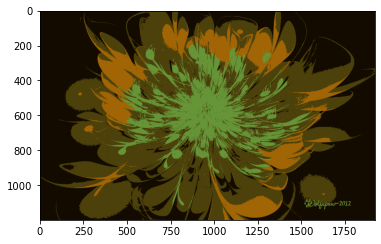

-1

In [2]:
image = cv2.imread("PeacockFeather-1.jpg")
#RgbImage = cv2.cvtcolor(image,cv2.COLOR_BGR2RGB)
print("Matrix of Original Image")
print(image)
print("Shape of Original Image")
print(image.shape)
# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values=image.reshape((-1,3))
print("After Reshaping : ")
print(pixel_values)

pixel_values=np.float32(pixel_values)
print(pixel_values.shape)

#define stopping criteria
criteria=(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,100,0.2)

#define number of clusters
k=4
_,labels,(centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS) #attempts=10 here

print("labels array",labels)

#convert back to 8 bit values
centers=np.uint(centers)

#flatten the labels array
labels=labels.flatten()

print("After flattening labels array",labels)

#convert all pixels into the color of the centroids
segmented_image=centers[labels]

#reshape back to original image dimension
segmented_image=segmented_image.reshape(image.shape)

#show the image
plt.imshow(segmented_image)
plt.show()
  
# waiting using waitKey method
cv2.waitKey(0)

### Applying Image Segmentation on Gray Image

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(1200, 1920)
[[0 0 0]
 [0 0 0]
 [0 0 0]
 ...
 [0 0 0]
 [0 0 0]
 [0 0 0]]
(768000, 3)


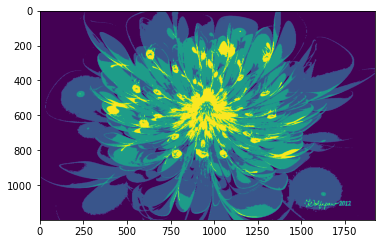

-1

In [3]:
image = cv2.imread("PeacockFeather-1.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
print(image)
print(image.shape)
# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values=image.reshape((-1,3))
print(pixel_values)

pixel_values=np.float32(pixel_values)
print(pixel_values.shape)

#define stopping criteria
criteria=(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,100,0.2)

#define number of clusters
k=4
_,labels,(centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS) #attempts=10 here

#convert back to 8 bit values
centers=np.uint(centers)

#flatten the labels array
labels=labels.flatten()

#convert all pixels into the color of the centroids
segmented_image=centers[labels.flatten()]

#reshape back to original image dimension
segmented_image=segmented_image.reshape(image.shape)

#show the image
plt.imshow(segmented_image)
plt.show()
  
# waiting using waitKey method
cv2.waitKey(0)